In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

Cleaning the data

Descriptive Statistics

In [23]:
text_data = "..\\data\\raw_analyst_ratings.csv"
try:
    df_csv = pd.read_csv(text_data, engine='python')
    print("CSV file loaded successfully.")
    print(df_csv.head())
except FileNotFoundError:
    print(f" Error: The file {text_data} was not found.")
except Exception as e:
    print(f"An error occurred while loading the csv file: {e}")

CSV file loaded successfully.
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  

In [24]:
df_csv["headline"]

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

In [25]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity
# Apply the sentiment analysis function to headlines
df_csv["sentiment"] = df_csv["headline"].apply(calculate_sentiment)

In [26]:
df_csv.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,0.00



Descriptive statistics for the 'headline' column:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object

Missing values in the 'headline' column:
0

Number of unique headlines
845770

Most frequent headlines:
headline
Benzinga's Top Upgrades                     5449
Benzinga's Top Downgrades                   5372
Benzinga's Top Initiations                  4241
Stocks That Hit 52-Week Lows On Thursday    3962
Morning Market Losers                       3440
Name: count, dtype: int64

Sentiment score distribution:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


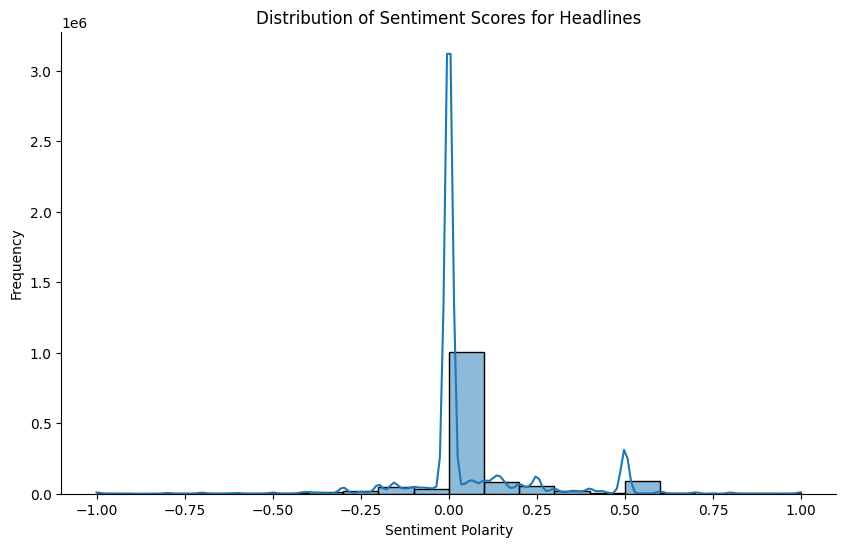


Most Positive Headlines:
                                               headline  sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0

Most Negative Headlines:
                                               headline  sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've just made a horrible investment       -1.0
5658   Worst Performing Industries For October 13, 2016       -1.0
5710   Worst Performing Industries For December 2, 2014       -1.0
6100                            10 Worst Stocks Of 2017       -1.0


In [27]:
# Display the desscriptive statistics for the 'headline' column
print("\nDescriptive statistics for the 'headline' column:")
print(df_csv["headline"].describe())
# Check for missing values in the 'headline' column
print("\nMissing values in the 'headline' column:")
print(df_csv["headline"].isnull().sum())
# Get the number of unique headlines
print("\nNumber of unique headlines")
print(df_csv["headline"].nunique())
# Display the most frequent headlines
print("\nMost frequent headlines:")
print(df_csv["headline"].value_counts().head())
#  You can further analyze the distibution of sentiment scores calulated earlier
print("\nSentiment score distribution:")
print(df_csv["sentiment"].describe())
# Plot distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_csv["sentiment"], bins=20, kde=True)
plt.title("Distribution of Sentiment Scores for Headlines")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide top and right spines
plt.show()

# Analyze the sentiment of the most positive and negative headlines
most_positive_headlines = df_csv.nlargest(5, 'sentiment')
print("\nMost Positive Headlines:")
print(most_positive_headlines[['headline', 'sentiment']])
most_negative_headlines = df_csv.nsmallest(5, 'sentiment')
print("\nMost Negative Headlines:")
print(most_negative_headlines[['headline', 'sentiment']])


=== Number of Articles per Publisher ===
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


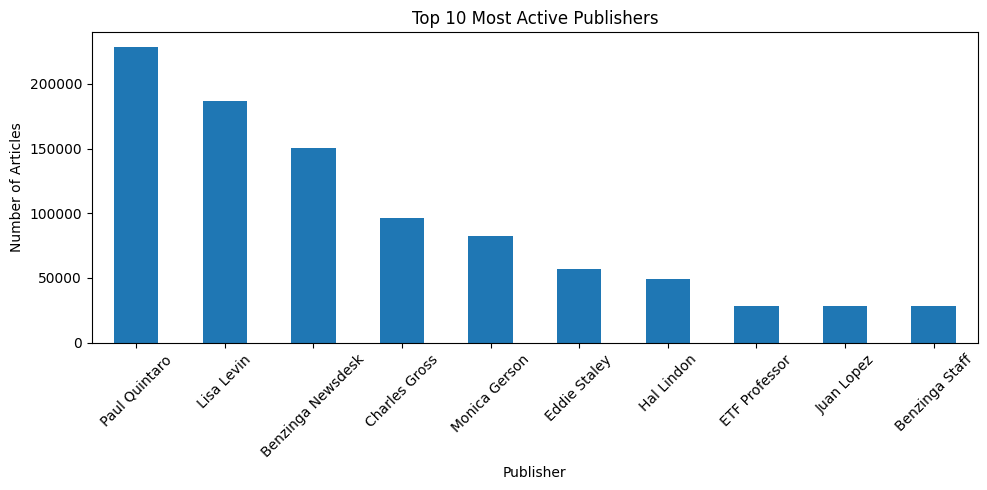


The number with invalid columns in the dataset is:
0


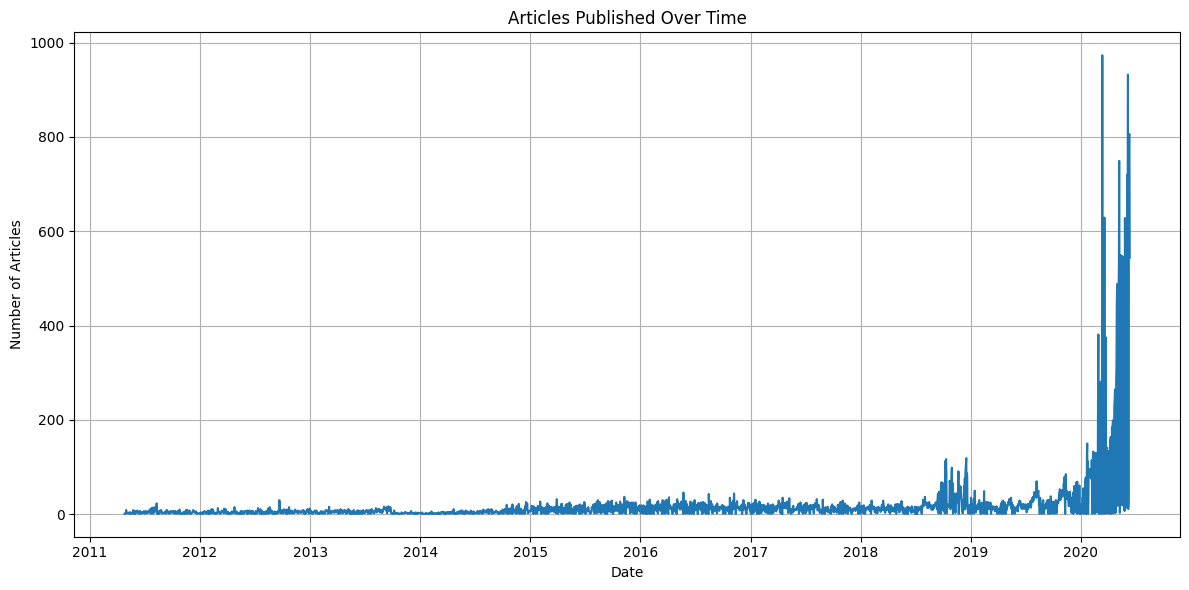

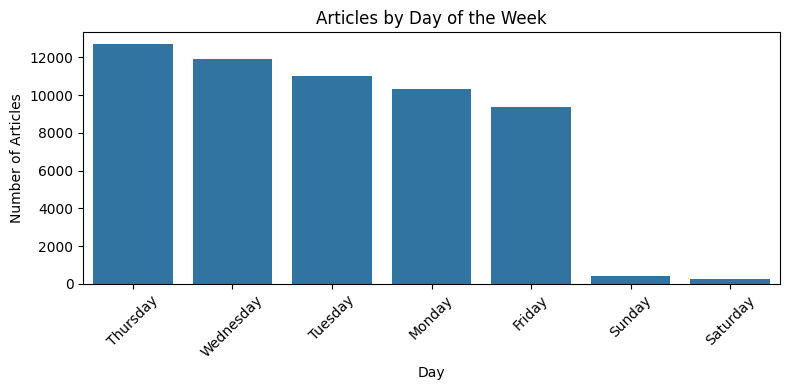

In [28]:
# ----- 2. Number of Articles per Publisher -----
publisher_counts = df_csv['publisher'].value_counts()

print("\n=== Number of Articles per Publisher ===")
print(publisher_counts)

# Plot top 10 publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ----- 3. Analyze Publication Dates -----
# Convert to datetime format
df_csv['date'] = pd.to_datetime(df_csv['date'], errors='coerce')

# Drop rows with invalid column entries
df_csv = df_csv.dropna(subset=['date', 'headline', 'publisher', 'stock'])
print("\nThe number with invalid columns in the dataset is:")
print(df_csv.isnull().sum().sum())

# Articles per day
articles_per_day = df_csv['date'].dt.date.value_counts().sort_index()

# Plot article frequency over time
plt.figure(figsize=(12, 6))
articles_per_day.plot(kind='line')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Articles by day of the week
df_csv['day_of_week'] = df_csv['date'].dt.day_name()
day_counts = df_csv['day_of_week'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title("Articles by Day of the Week")
plt.ylabel("Number of Articles")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Analysis(Topic Modeling)

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
# Combine all headlines into one text blob
all_text = ' '.join(df_csv["headline"].astype(str))

# Tokenize and clean
tokens = word_tokenize(all_text.lower())
stop_words = set(stopwords.words('english'))
keywords = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get top 20 most common words
common_words = Counter(keywords).most_common(20)

print("Top Keywords:")
for word, freq in common_words:
    print(f"{word}: {freq}")
sia = SentimentIntensityAnalyzer()

# Apply sentiment scores to each headline
df_csv["sentiment_score"] = df_csv["headline"].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment
df_csv["sentiment_label"] = df_csv["sentiment_score"].apply(
    lambda score: "positive" if score > 0.05 else "negative" if score < -0.05 else "neutral"
)

print(df_csv[["headline", "sentiment_score", "sentiment_label"]].head())


[nltk_data] Downloading package punkt to C:\Users\Mulat
[nltk_data]     Yazew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mulat
[nltk_data]     Yazew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Mulat
[nltk_data]     Yazew\AppData\Roaming\nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Mulat Yazew/nltk_data'
    - 'd:\\KAIM_Projects\\Kifiya_AIM_Week1_Projects\\venv\\nltk_data'
    - 'd:\\KAIM_Projects\\Kifiya_AIM_Week1_Projects\\venv\\share\\nltk_data'
    - 'd:\\KAIM_Projects\\Kifiya_AIM_Week1_Projects\\venv\\lib\\nltk_data'
    - 'C:\\Users\\Mulat Yazew\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
